# Definition of Orthogonal matrix

### Orthonormal vectors
$$q_i^Tq_j = 
\left\{\begin{array}{ll}0 &\text{if } i\neq j\\
1 &\text{if }i=j\end{array}\right.$$

### Orthogonal matrix

The columns of orthogonal matrix are orthonormal vectors.

$$Q = [q_1\ q_2\ \cdots\ q_n]$$

And it has the property $Q^T Q = I$

If $Q$ is square, then $Q^T = Q^{-1}$

-----------------

# Advantages of using orthogonal matrices

Many matrix computation can be simplified by making use of orthogonal matrix. Here are the examples.

### Projection matrix
The projection matrix has the form

$$P = A(A^TA)^{-1}A^T$$

If $A$ is the orthogonal matrix $Q$, then we obtain

$$P = Q(Q^TQ)^{-1}Q^T = QIQ^T = QQ^T$$
If $Q$ is a square matrix, then $QQ^T=(Q^TQ)^T = I$.

### Normal equation

$$A^TA\hat{x} = A^T b$$

If $A$ is the orthogonal matrix $Q$, then we obtain

$$Q^TQ\hat{x} = Q^Tb\Rightarrow \hat{x} = Q^Tb\Rightarrow \hat{x}_i = q_i^T b$$

-------------

# Gram-Schmidt

Gram-Schmidt is a calculation for making a matrix orthogonal, which can be denoted by
$$A\xrightarrow[]{Gram-Schmidt} Q$$

Assumed that $A$ is composed of independent column vectors.
$$A = [a_1\ a_2\ \cdots\ a_n]$$

The Gram-Schmidt procedure is as follows

> 1. Start with the first column vector $a_1$ and make its length $1$
>$$q_1 = \frac{a_1}{\|a_1\|}$$
> 2. Eliminate the projected part of $a_2$ onto $a_1$ to obtain its perpendicular part.
> $$e_2 = a_2 - \frac{a_1^T a_1}{a_1 a_1^T} a_2$$
> 3. Normalize $e_2$ to obtain $q_2$
> $$q_2 = \frac{e_2}{\|e_2\|}$$
> 4. Eliminate the projected parts of $a_3$ onto $a_1$ and $a_2$ represently to obtain its perpendicular part.
> $$e_3 = a_3 - \frac{a_1^T a_1}{a_1 a_1^T} a_3 - \frac{a_2^T a_2}{a_2 a_2^T} a_3$$
> 6. Normalize $e_3$ to obtain $q_3$
> $$q_3 = \frac{e_3}{\|e_3\|}$$

The remaining orthonormal vectors can be compute with the same approach.

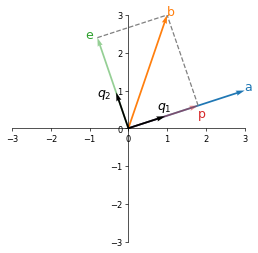

In [2]:
import matplotlib.pyplot as plt
import numpy as np

a = np.array([3, 1])
b = np.array([1, 3])

def axesCross(ax):
    ax.spines["top"].set_color("none")
    ax.spines["bottom"].set_position("zero")
    ax.spines["left"].set_position("zero")
    ax.spines["right"].set_color("none")

def set_limit(ax, limit):
    ax.set_xlim(-limit, limit)
    ax.set_ylim(-limit, limit)
    
def main():
    fig = plt.figure(figsize=(5,5), dpi=60)
    ax = fig.add_subplot(1,1,1)
    
    axesCross(ax)
    limit = 3
    set_limit(ax, 3)
    
    ax.quiver(0, 0, a[0], a[1], color="C0", angles='xy', scale=1, scale_units='xy')
    ax.quiver(0, 0, b[0], b[1], color="C1", angles='xy', scale=1, scale_units='xy')
    
    p = (a.T@b)/(a.T@a)*a
    e = b-p
    ax.quiver(0, 0, e[0], e[1], color="C2", angles='xy', scale=1, scale_units='xy', linestyle='dashed', alpha=.5)
    ax.quiver(0, 0, p[0], p[1], color="C3", angles='xy', scale=1, scale_units='xy', linestyle='dashed', alpha=.5)
    ax.plot([p[0], b[0]], [p[1], b[1]], linestyle='dashed', color='grey')
    ax.plot([e[0], b[0]], [e[1], b[1]], linestyle='dashed', color='grey')
    
    ax.text(a[0], a[1], "a", fontsize=15, color='C0')
    ax.text(b[0], b[1], "b", fontsize=15, color='C1')
    ax.text(p[0], p[1]-.3, "p", fontsize=15, color='C3')
    ax.text(e[0]-.3, e[1], "e", fontsize=15, color='C2')
    
    q1 = a/np.sqrt(a[0]**2+a[1]**2)
    e2 = b-a.reshape(-1, 1)@a.reshape(1, -1)/(a@a) @ b
    q2 = e2/np.sqrt(e2[0]**2+e2[1]**2)
    ax.quiver(0, 0, q1[0], q1[1], color="k", angles='xy', scale=1, scale_units='xy')
    ax.quiver(0, 0, q2[0], q2[1], color="k", angles='xy', scale=1, scale_units='xy')
    ax.text(q1[0]-.2, q1[1]+.2, r"$q_1$", fontsize=15, color='k')
    ax.text(q2[0]-.5, q2[1]-.1, r"$q_2$", fontsize=15, color='k')
    plt.show()


if __name__=="__main__":
    main()

The transform between $A$ and $Q$ can be written in the form

$$A = QR$$

which is the expression of the Gram-Schmidt. The internel of these matrices is given by

$$[a_1\ a_2\ \cdots a_n] = [q_1\ q_2\ \cdots q_n]
\begin{bmatrix}
r_{11} &r_{12} &r_{13} &\cdots &r_{1n}\\
0 &r_{22} &r_{23} &\cdots &r_{2n}\\
0 &0 &r_{33} &\cdots &r_{3n}\\
\vdots &\vdots &\vdots &\ddots &\vdots\\
0 &0 &0 &\cdots &r_{nn}\\
\end{bmatrix}$$
where $R$ is an upper triangular matrix. Because from the calculation we discussed above, it is obvious that $a_1$ is in the column space of $q_1$, and $a_2$ is in the column space of $[q_1\ q_2]$ and so on.